In [1]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

Dataset link: https://www.kaggle.com/datasets/CooperUnion/cardataset

In [3]:
uploaded = files.upload()

Saving car_data.csv to car_data.csv


###EDA Exploratory Data Analysis


In [4]:
data = pd.read_csv("car_data.csv")
data.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [5]:
data.tail()

Make   Model  Year                Engine Fuel Type  Engine HP  \
11909    Acura     ZDX  2012     premium unleaded (required)      300.0   
11910    Acura     ZDX  2012     premium unleaded (required)      300.0   
11911    Acura     ZDX  2012     premium unleaded (required)      300.0   
11912    Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                  Market Category Vehicle Size  Vehicle Style  highway MPG  \
11909  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11910  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11911  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11912  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11913                      Luxury      Midsize          Sedan           26   

       city mpg  Popularity   MSRP  
11909        16         204  46120  
11910        16         204  56670  
11911        16         204  50620  
11912        16         204  50920  
11913        17          61  28995

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
data.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

In [8]:
data.shape

(11914, 16)

In [9]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [10]:
data.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [11]:
missing_values = data.isnull().any(axis=1)
print(missing_values)

0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool


In [12]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

         Make     Model  Year             Engine Fuel Type  Engine HP  \
14        BMW  1 Series  2013  premium unleaded (required)      230.0   
18       Audi       100  1992             regular unleaded      172.0   
20       Audi       100  1992             regular unleaded      172.0   
24       Audi       100  1993             regular unleaded      172.0   
25       Audi       100  1993             regular unleaded      172.0   
...       ...       ...   ...                          ...        ...   
11481  Suzuki      X-90  1998             regular unleaded       95.0   
11603   Volvo      XC60  2017             regular unleaded      302.0   
11604   Volvo      XC60  2017             regular unleaded      240.0   
11708  Suzuki       XL7  2008             regular unleaded      252.0   
11717  Suzuki       XL7  2008             regular unleaded      252.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
14                  6.0            MANUAL 

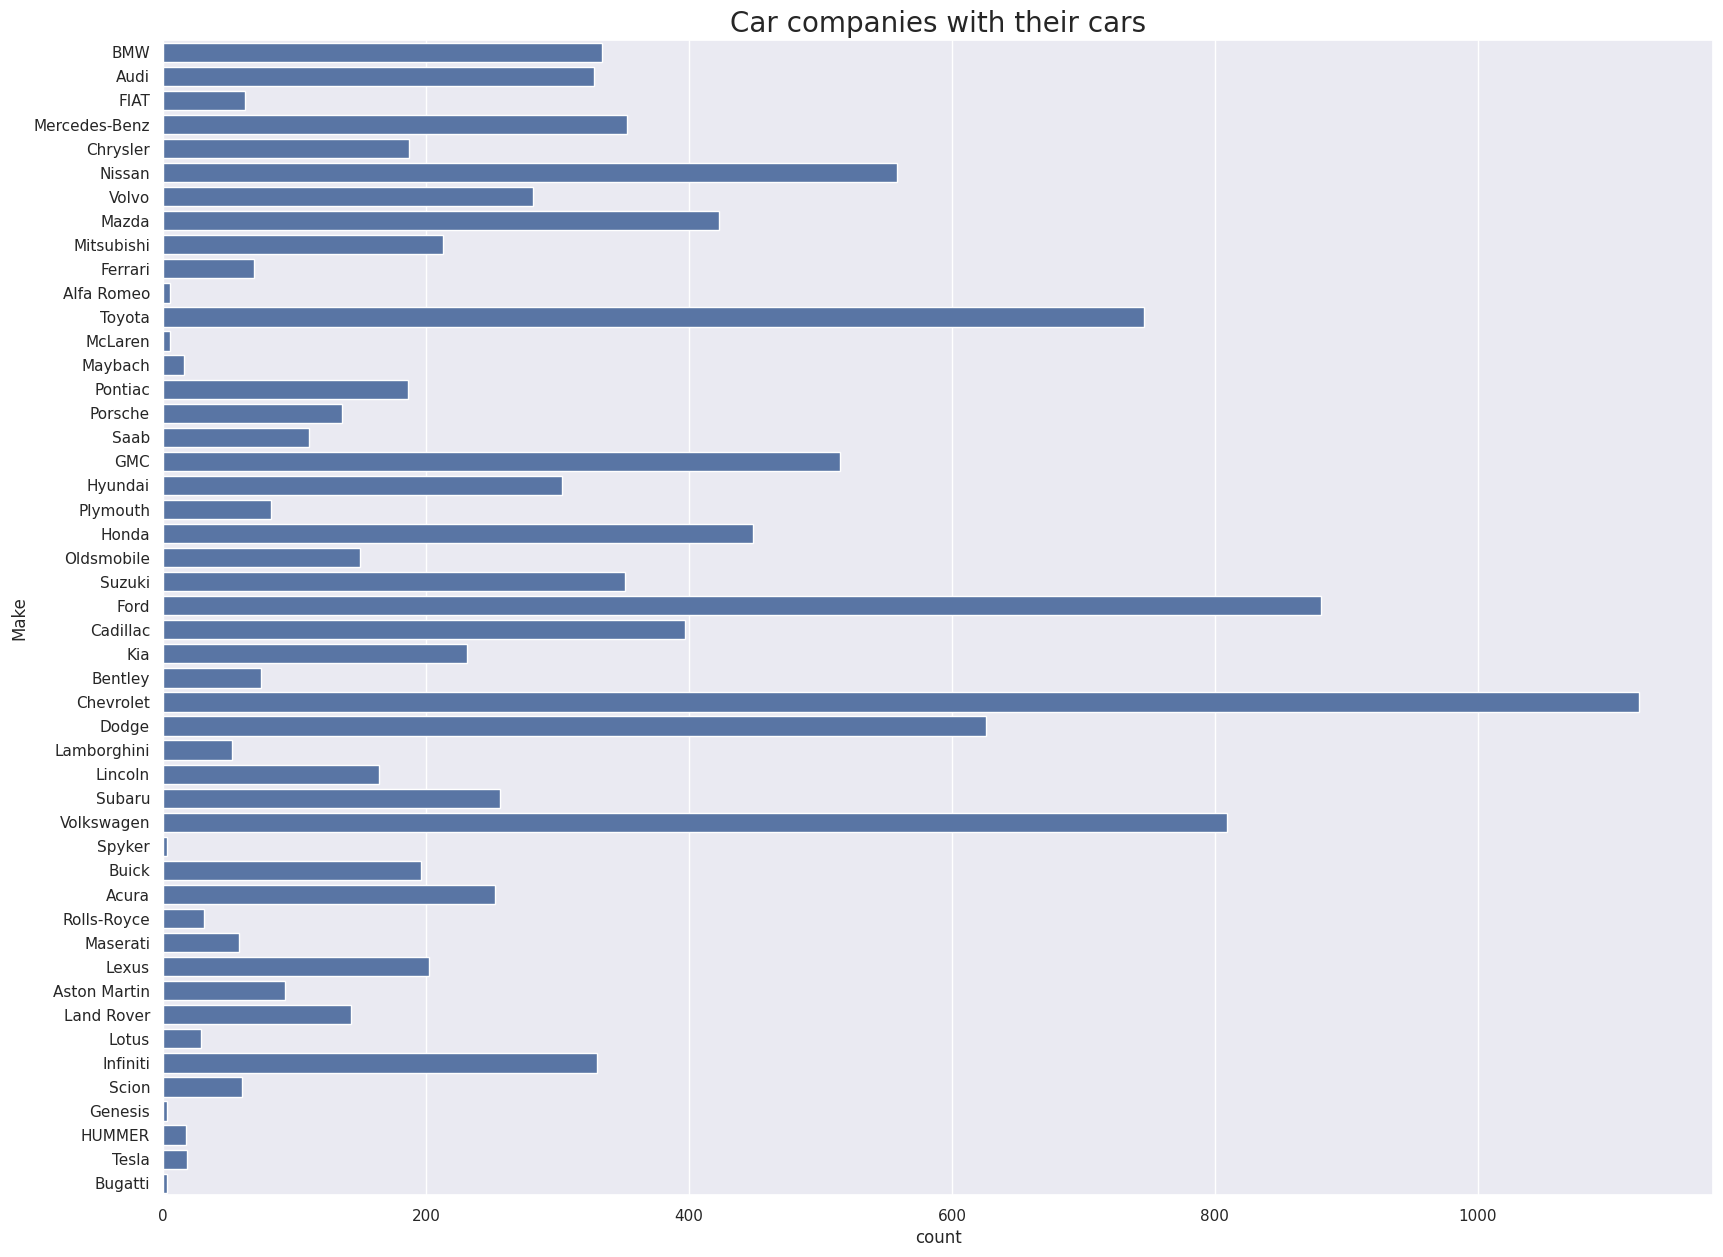

In [13]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

<Axes: xlabel='Vehicle Size', ylabel='count'>

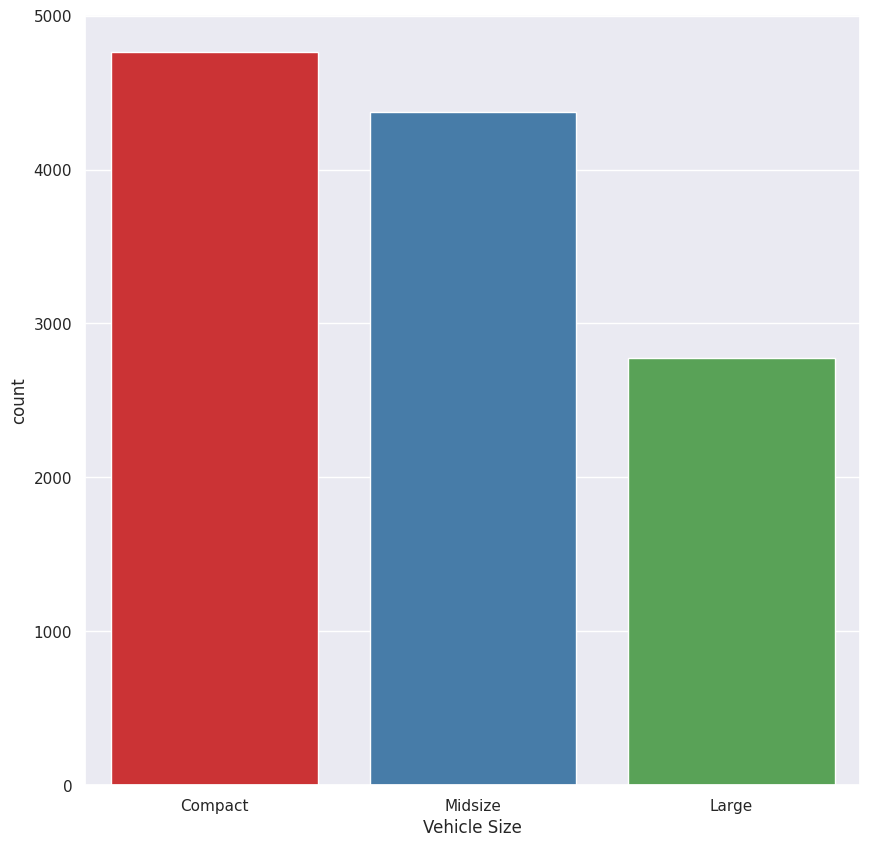

In [14]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

<Axes: >

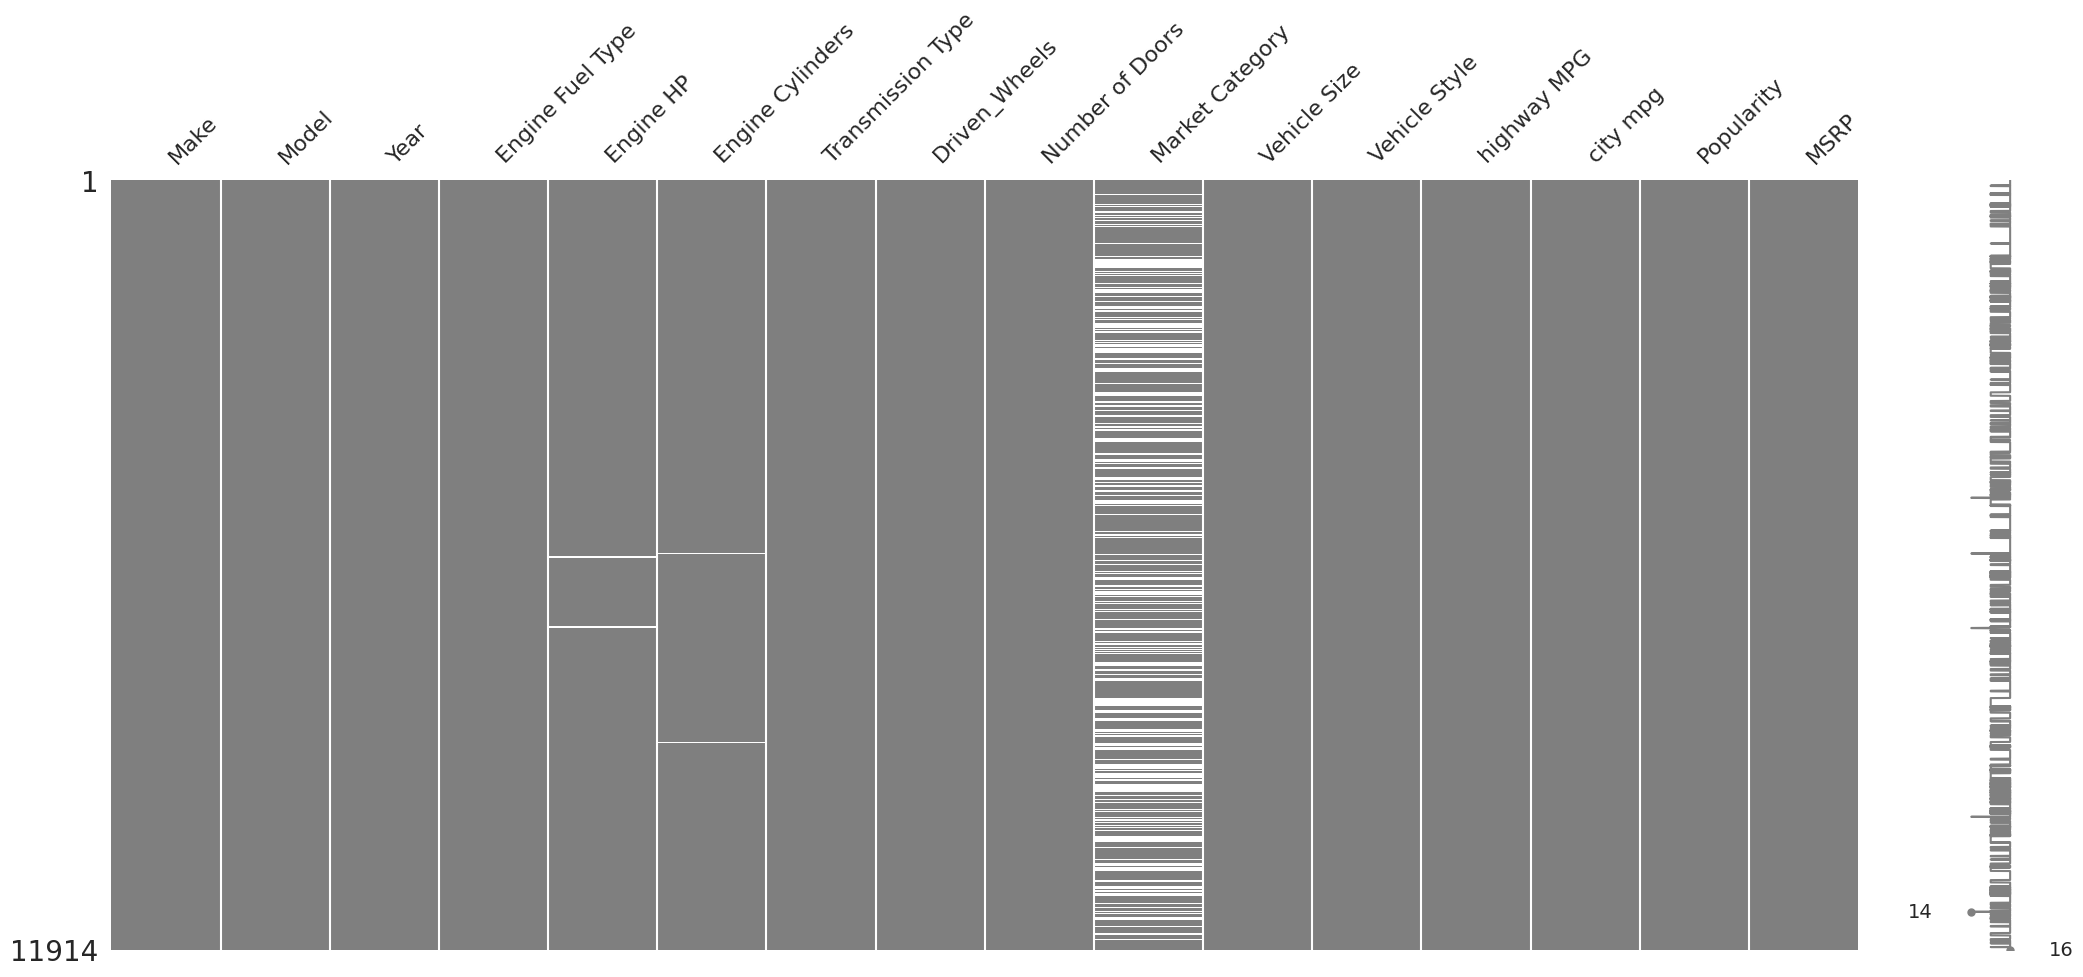

In [15]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

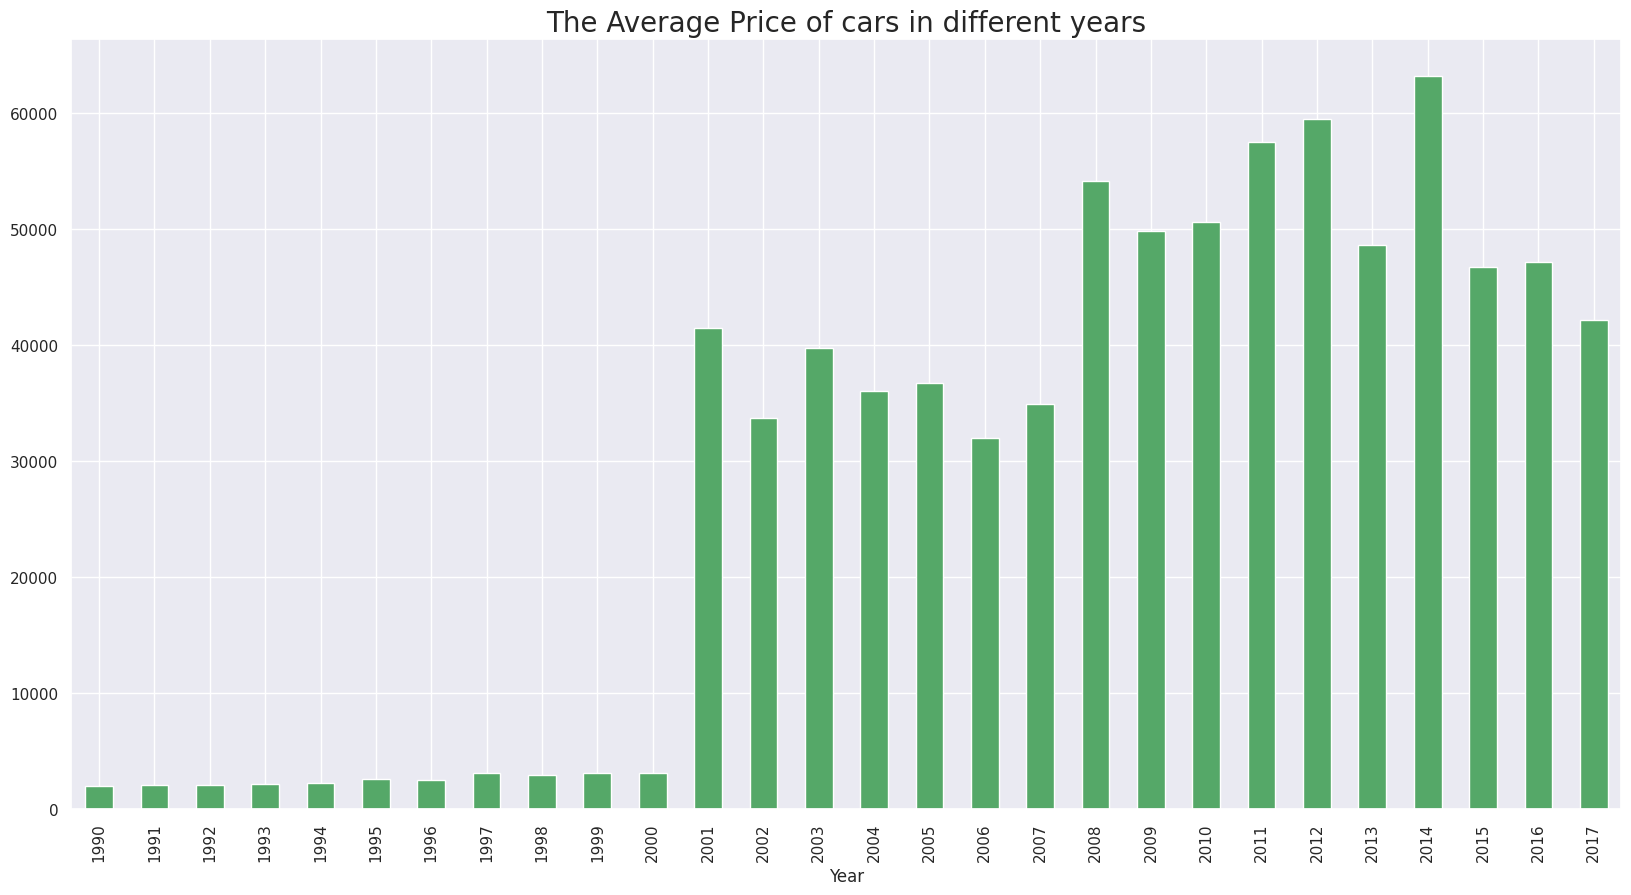

In [16]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()

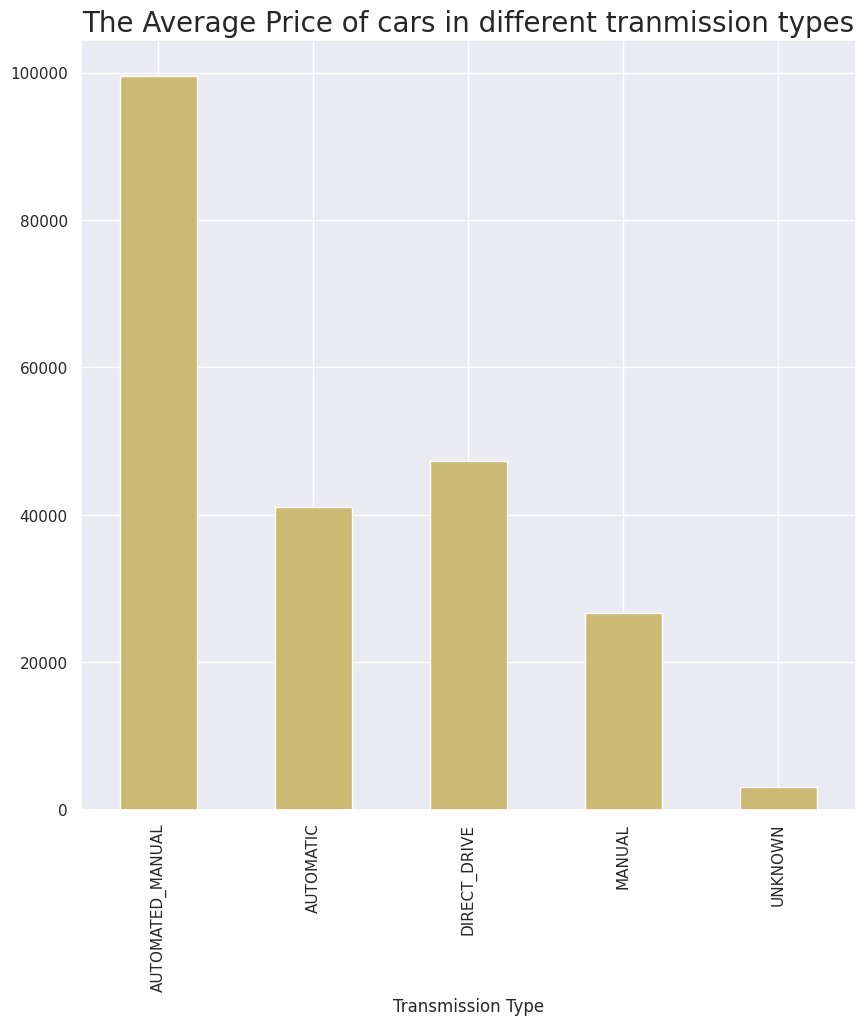

In [17]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()

<Axes: >

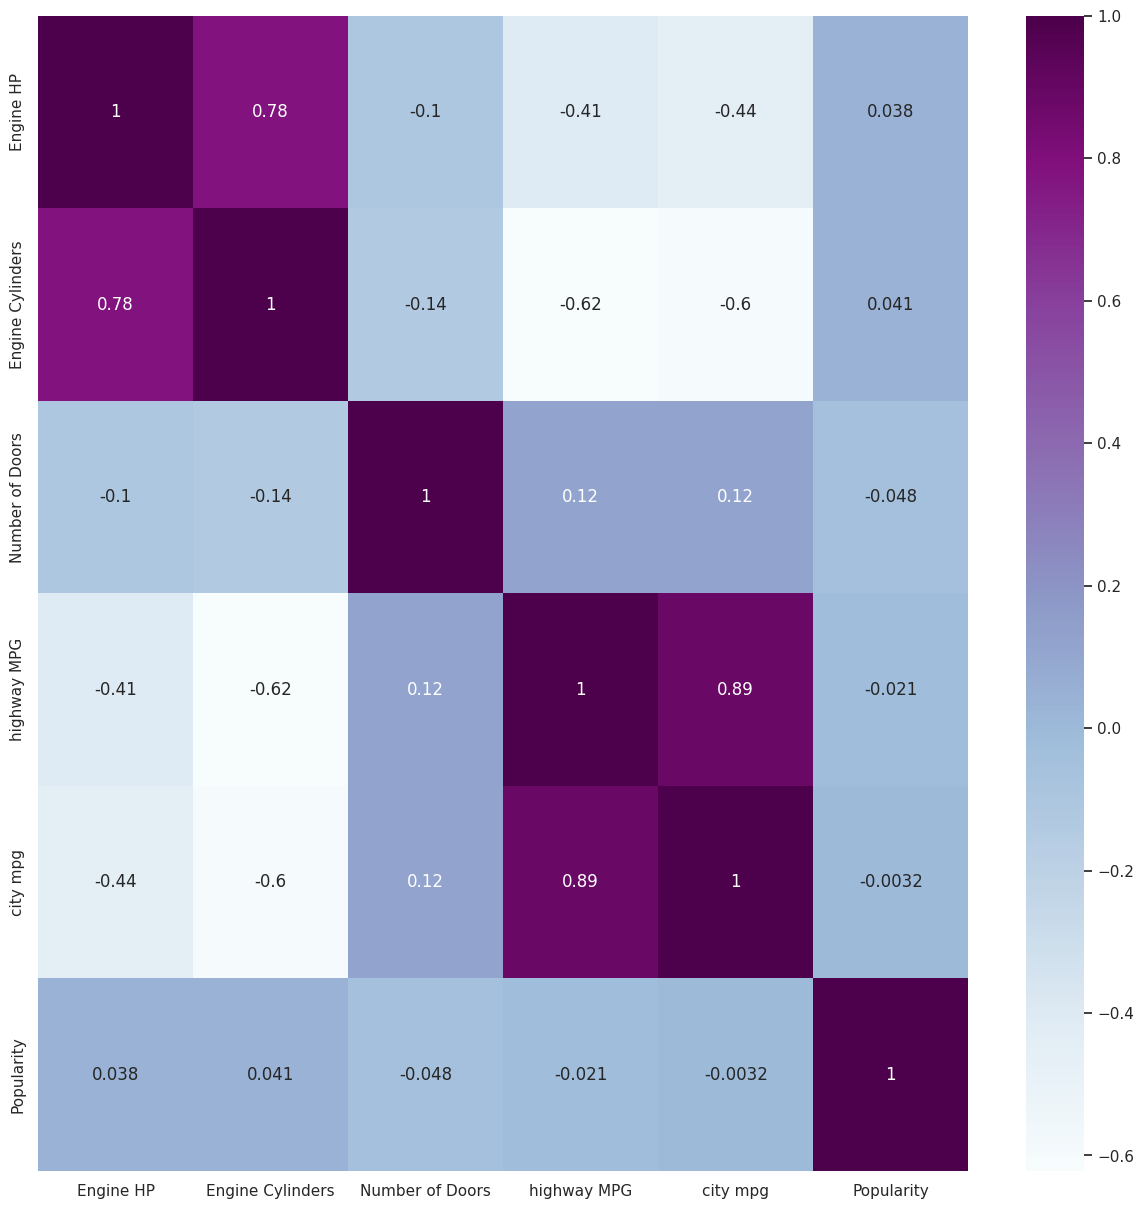

In [18]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()
sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [19]:
print(data.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

###Data Cleaning

In [31]:
data.columns = data.columns.str.lower().str.replace(" ", "_")
data.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'driven_wheels' : 'drive', 'number_of_doors' : 'doors', 'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)

In [32]:
print('Number of duplicates are : ', data.duplicated().sum())
data = data.drop_duplicates()

Number of duplicates are :  715


In [33]:
print('Number of missing values in each columns are below : ')
print(data.isnull().sum())

Number of missing values in each columns are below : 
make                       0
model                      0
year                       0
fuel_type                  3
hp                        69
cylinders                 30
transmission               0
drive                      0
doors                      6
market                  3376
size                       0
style                      0
highway_mpg                0
city_mpg                   0
popularity                 0
price                      0
years_of_manufacture       0
dtype: int64


In [34]:
data.drop('market', axis = 1, inplace = True)

In [36]:
null_values = data[data.isnull().any(axis = 1)]
null_values

make    model  year fuel_type     hp  cylinders  transmission  \
539         FIAT     500e  2015  electric    NaN        0.0  DIRECT_DRIVE   
540         FIAT     500e  2016  electric    NaN        0.0  DIRECT_DRIVE   
541         FIAT     500e  2017  electric    NaN        0.0  DIRECT_DRIVE   
1983   Chevrolet  Bolt EV  2017  electric  200.0        NaN  DIRECT_DRIVE   
1984   Chevrolet  Bolt EV  2017  electric  200.0        NaN  DIRECT_DRIVE   
...          ...      ...   ...       ...    ...        ...           ...   
9853         Kia  Soul EV  2016  electric    NaN        0.0  DIRECT_DRIVE   
9854         Kia  Soul EV  2016  electric    NaN        0.0  DIRECT_DRIVE   
11321     Suzuki   Verona  2004       NaN  155.0        6.0     AUTOMATIC   
11322     Suzuki   Verona  2004       NaN  155.0        6.0     AUTOMATIC   
11323     Suzuki   Verona  2004       NaN  155.0        6.0     AUTOMATIC   

                   drive  doors     size          style  highway_mpg  \
539    front wheel drive    2.0  Compact  2dr Hatchback          108   
540    front wheel drive    2.0  Compact  2dr Hatchback          103   
541    front wheel drive    2.0  Compact  2dr Hatchback          103   
1983   front wheel drive    4.0  Compact  4dr Hatchback          110   
1984   front wheel drive    4.0  Compact  4dr Hatchback          110   
...                  ...    ...      ...            ...          ...   
9853   front wheel drive    4.0  Compact          Wagon           92   
9854   front wheel drive    4.0  Compact          Wagon           92   
11321  front wheel drive    4.0  Midsize          Sedan           25   
11322  front wheel drive    4.0  Midsize          Sedan           25   
11323  front wheel drive    4.0  Midsize          Sedan           25   

       city_mpg  popularity  price  years_of_manufacture  
539         122         819  31800                     6  
540         121         819  31800                     5  
541         121         819  31800                     4  
1983        128        1385  40905                     4  
1984        128        1385  36620                     4  
...         ...         ...    ...                   ...  
9853        120        1720  31950                     5  
9854        120        1720  35950                     5  
11321        17         481  17199                    17  
11322        17         481  20199                    17  
11323        17         481  18499                    17  

[102 rows x 16 columns]

In [37]:
data['fuel_type'] = data['fuel_type'].fillna('regular unleaded')
data['hp'] = data['hp'].fillna(0)
data['cylinders'] = data['cylinders'].fillna(0)
data['doors'] = data['doors'].fillna(data['doors'].mean())

In [38]:
num_col = data.select_dtypes(include = [np.number])
cat_col = data.select_dtypes(exclude = [np.number])

In [40]:
for col in cat_col:
    print(col)
    print(data[col].unique())
    print(data[col].nunique())
    print('\n', "======================================", '\n')

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48


model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti

In [41]:
data.head()

make       model  year                    fuel_type     hp  cylinders  \
0  BMW  1 Series M  2011  premium unleaded (required)  335.0        6.0   
1  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
2  BMW    1 Series  2011  premium unleaded (required)  300.0        6.0   
3  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   
4  BMW    1 Series  2011  premium unleaded (required)  230.0        6.0   

  transmission             drive  doors     size        style  highway_mpg  \
0       MANUAL  rear wheel drive    2.0  Compact        Coupe           26   
1       MANUAL  rear wheel drive    2.0  Compact  Convertible           28   
2       MANUAL  rear wheel drive    2.0  Compact        Coupe           28   
3       MANUAL  rear wheel drive    2.0  Compact        Coupe           28   
4       MANUAL  rear wheel drive    2.0  Compact  Convertible           28   

   city_mpg  popularity  price  years_of_manufacture  
0        19        3916  46135                    10  
1        19        3916  40650                    10  
2        20        3916  36350                    10  
3        18        3916  29450                    10  
4        18        3916  34500                    10

In [42]:
data.drop(data[data['transmission']=='UNKNOWN'].index, axis='index', inplace = True)

In [44]:
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [45]:
for i in num_col:
    fig = px.box(data, x = data[i])
    fig.update_traces(fillcolor = '#C9A26B')
    fig.show()

In [46]:
s1 = data.shape
clean = data[['hp', 'cylinders', 'highway_mpg', 'city_mpg', 'price']]
for i in clean.columns:
    qt1 = data[i].quantile(0.25)
    qt3 = data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = data[data[i]<lower].index
    max_in = data[data[i]>upper].index
    data.drop(min_in, inplace = True)
    data.drop(max_in, inplace = True)
s2 = data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1403


In [47]:
fig = px.box(data, x = data['hp'])
fig.update_traces(fillcolor = '#C9A26B')

In [48]:
data.describe()

year           hp    cylinders        doors  highway_mpg  \
count  9784.00000  9784.000000  9784.000000  9784.000000  9784.000000   
mean   2010.31204   231.154334     5.424162     3.505110    26.304374   
std       7.46610    78.693348     1.395065     0.841754     5.745849   
min    1990.00000     0.000000     3.000000     2.000000    12.000000   
25%    2006.00000   170.000000     4.000000     3.000000    22.000000   
50%    2014.00000   220.000000     6.000000     4.000000    26.000000   
75%    2016.00000   288.000000     6.000000     4.000000    30.000000   
max    2017.00000   485.000000     8.000000     4.000000    42.000000   

          city_mpg   popularity         price  years_of_manufacture  
count  9784.000000  9784.000000   9784.000000            9784.00000  
mean     19.180192  1560.331664  29204.537612              10.68796  
std       4.376362  1464.248520  15605.472026               7.46610  
min      10.000000    21.000000   2000.000000               4.00000  
25%      16.000000   549.000000  20498.000000               5.00000  
50%      18.000000  1385.000000  29089.000000               7.00000  
75%      22.000000  2009.000000  38850.000000              15.00000  
max      31.000000  5657.000000  70900.000000              31.00000

from matplotlib import pyplot as plt
_df_0['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['hp'].plot(kind='hist', bins=20, title='hp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cylinders'].plot(kind='hist', bins=20, title='cylinders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['doors'].plot(kind='hist', bins=20, title='doors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='year', y='hp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='hp', y='cylinders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cylinders', y='doors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='doors', y='highway_mpg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['hp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('hp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['cylinders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('cylinders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['doors']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('doors')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['highway_mpg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('highway_mpg')

from matplotlib import pyplot as plt
_df_12['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['hp'].plot(kind='line', figsize=(8, 4), title='hp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['cylinders'].plot(kind='line', figsize=(8, 4), title='cylinders')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['doors'].plot(kind='line', figsize=(8, 4), title='doors')
plt.gca().spines[['top', 'right']].set_visible(False)

In [50]:
for i in data:
    fig = px.histogram(data, x= i, color_discrete_sequence = ['#C9A26B'])
    fig.show()

In [55]:
fig = px.scatter(data, x = 'year', y = 'price', color = 'cylinders')
fig.show()

In [56]:
fig = px.scatter(data, x = 'hp', y = 'price', color = 'cylinders')
fig.show()

In [57]:
fig = px.scatter(data, x = 'cylinders', y = 'price', color = 'cylinders')
fig.show()

In [58]:
fig = px.scatter(data, x = 'doors', y = 'price', color = 'cylinders')
fig.show()

In [59]:
fig = px.scatter(data, x = 'city_mpg', y = 'price', color = 'cylinders')
fig.show()

###Preprocessing

In [60]:
cat_features = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
cars_data = pd.get_dummies(data, columns = cat_features)

In [61]:
X = cars_data.drop('price', axis = 1)
y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [62]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Modeling

In [63]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_algo = make_pipeline(rfr)

rfr_algo.fit(X_train, y_train)
rfr_pred = rfr_algo.predict(X_test)

print('R2 Score is : ', r2_score(y_test, rfr_pred))
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, rfr_pred)))

R2 Score is :  0.957404947895775
Mean squared error is :  3329.7723857809056


<Axes: xlabel='price', ylabel='Predicted Value'>

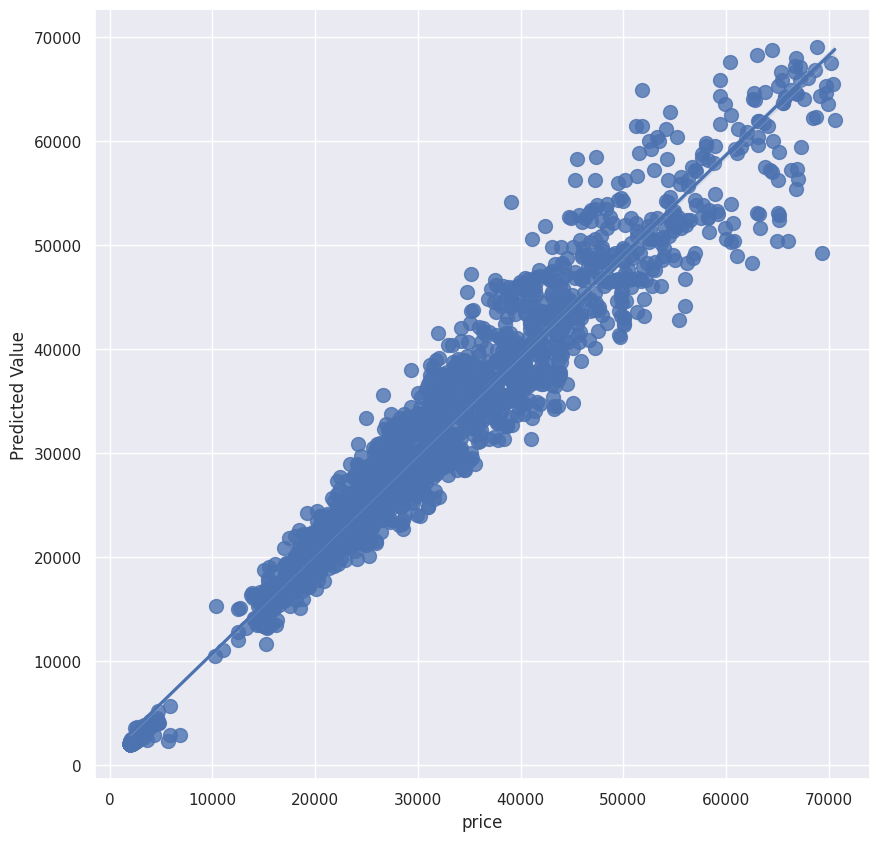

In [66]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=rfr_pred, fit_reg=True, scatter_kws={"s": 100})

###Linear Regression

In [68]:
X = cars_data.drop('price', axis = 1)
y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [69]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error is : ', mean_absolute_error(y_test, y_predict))

R2 Score is :  -1.0246938575568491e+22
Mean squared error is :  1633172418608675.5
Mean absolute error is :  79079197194166.52


<Axes: xlabel='price', ylabel='Predicted Output'>

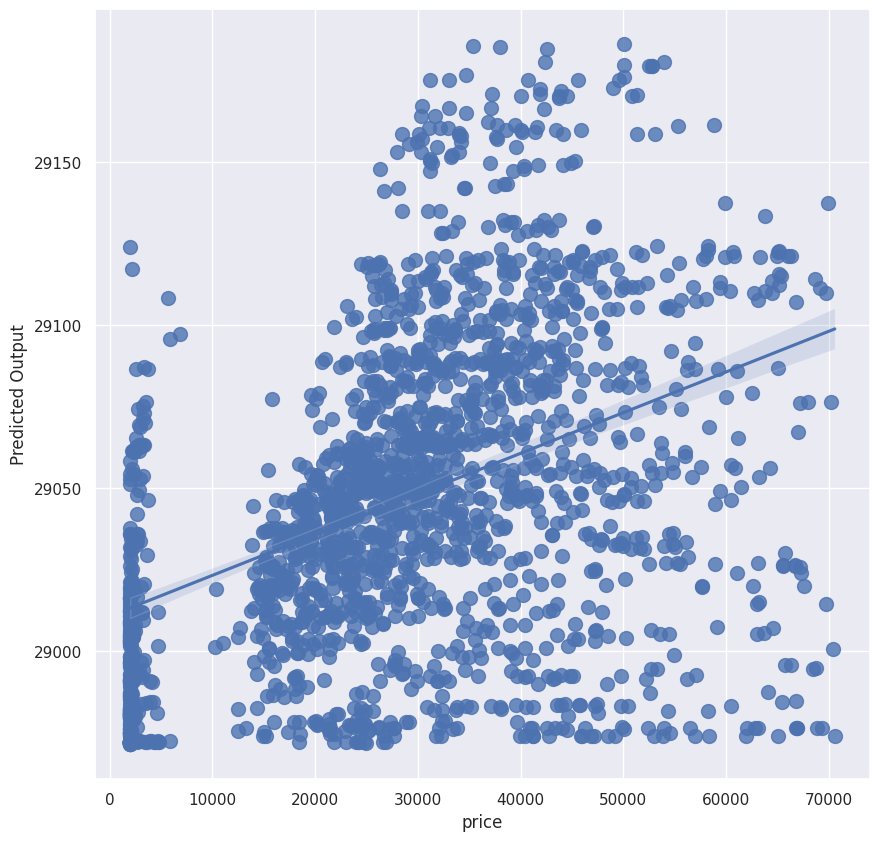

In [76]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=y_predict, fit_reg=True, scatter_kws={"s": 100})

###Support Vector Machine

In [74]:
model = SVR()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

R2 Score is :  0.002331972813605643


<Axes: xlabel='price', ylabel='Predicted Output'>

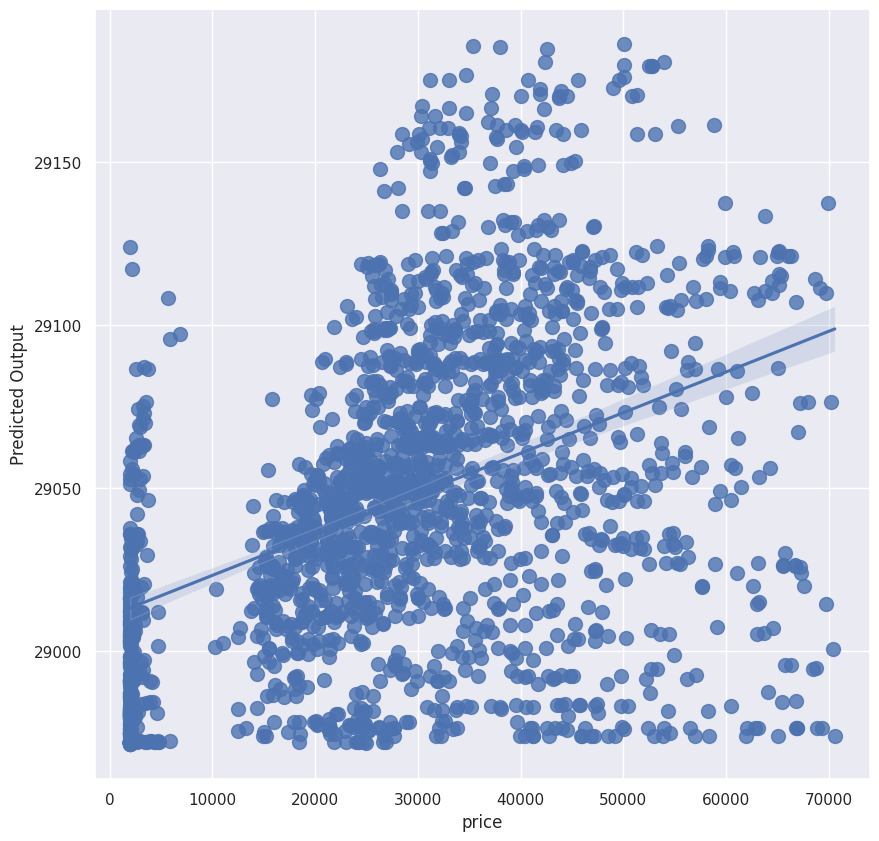

In [75]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=y_predict, fit_reg=True, scatter_kws={"s": 100})

###K-Neighbors Regressor

In [80]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error is : ', mean_absolute_error(y_test, y_predict))

R2 Score is :  0.9062527801635744
Mean squared error is :  4939.8546334188995
Mean absolute error is :  2974.188809402146


<Axes: xlabel='price', ylabel='Predicted Output'>

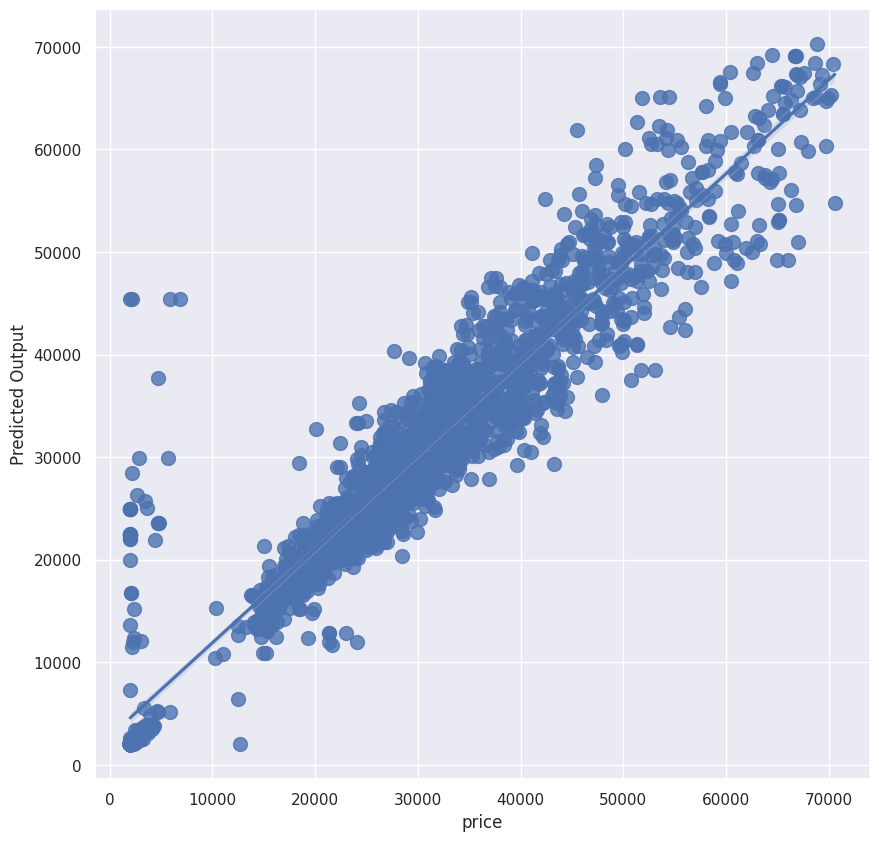

In [78]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=y_predict, fit_reg=True, scatter_kws={"s": 100})

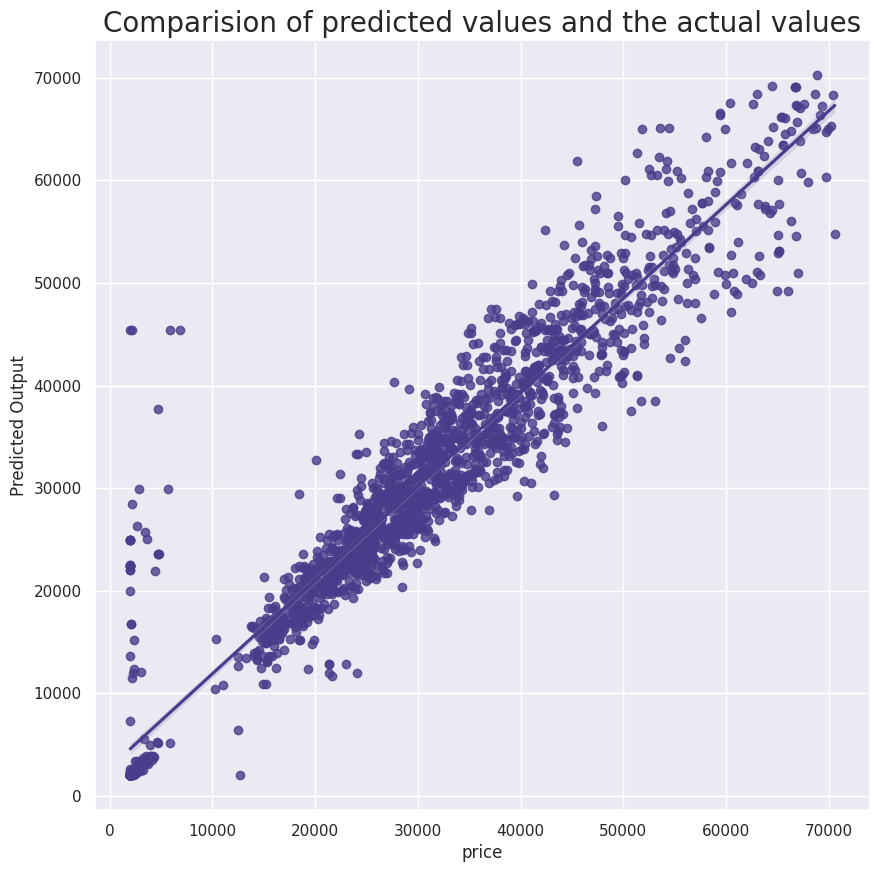

In [82]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

###PLS Regression

In [83]:
model = PLSRegression(n_components = 20)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error is : ', mean_absolute_error(y_test, y_predict))

R2 Score is :  0.9514598201973687
Mean squared error is :  3554.5584561290225
Mean absolute error is :  2560.5333266003518


<Axes: xlabel='price', ylabel='Predicted Output'>

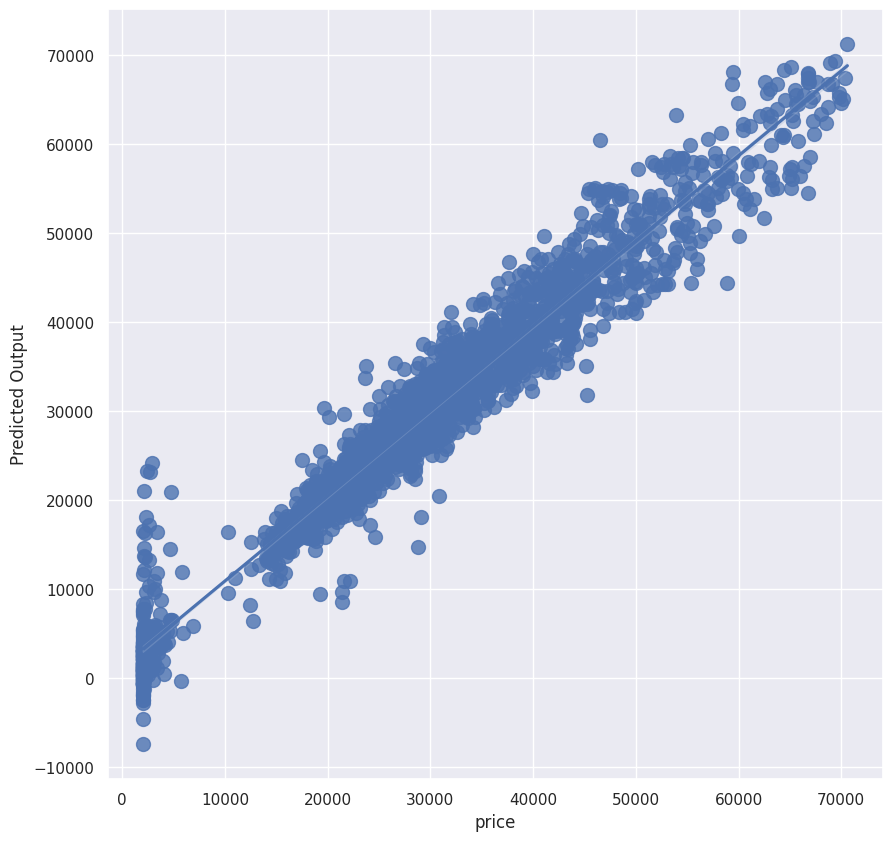

In [84]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(x=y_test, y=y_predict, fit_reg=True, scatter_kws={"s": 100})

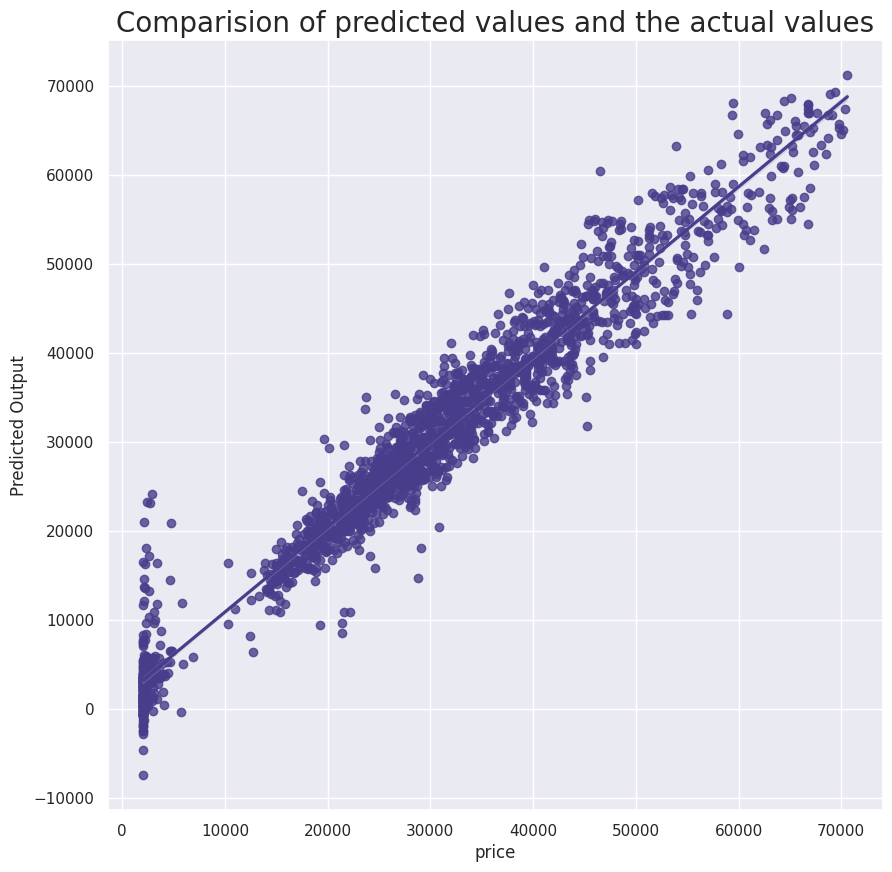

In [85]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

###Decision Tree Regressor

In [86]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error is : ', mean_absolute_error(y_test, y_predict))

R2 Score is :  0.9327054500135274
Mean squared error is :  4185.283844566405
Mean absolute error is :  2611.272409731301


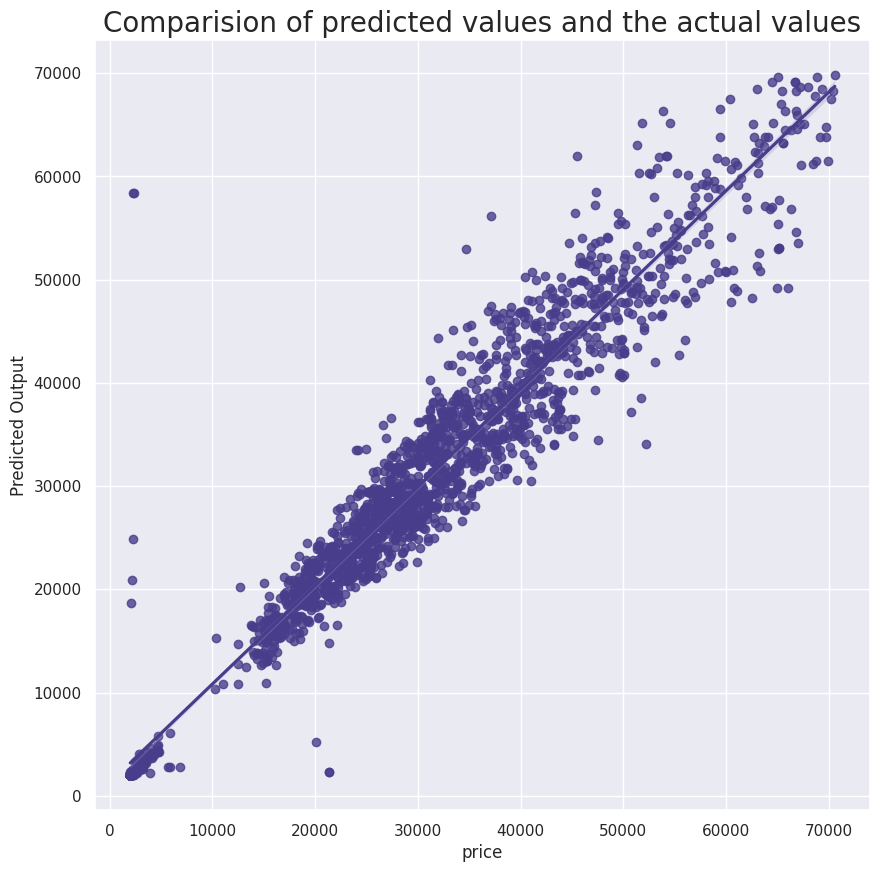

In [87]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

###Gradient Boosted Decision Regressor

In [88]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error is : ', mean_absolute_error(y_test, y_predict))

R2 Score is :  0.9228440173017133
Mean squared error is :  4481.462574751727
Mean absolute error is :  3291.7864497946352


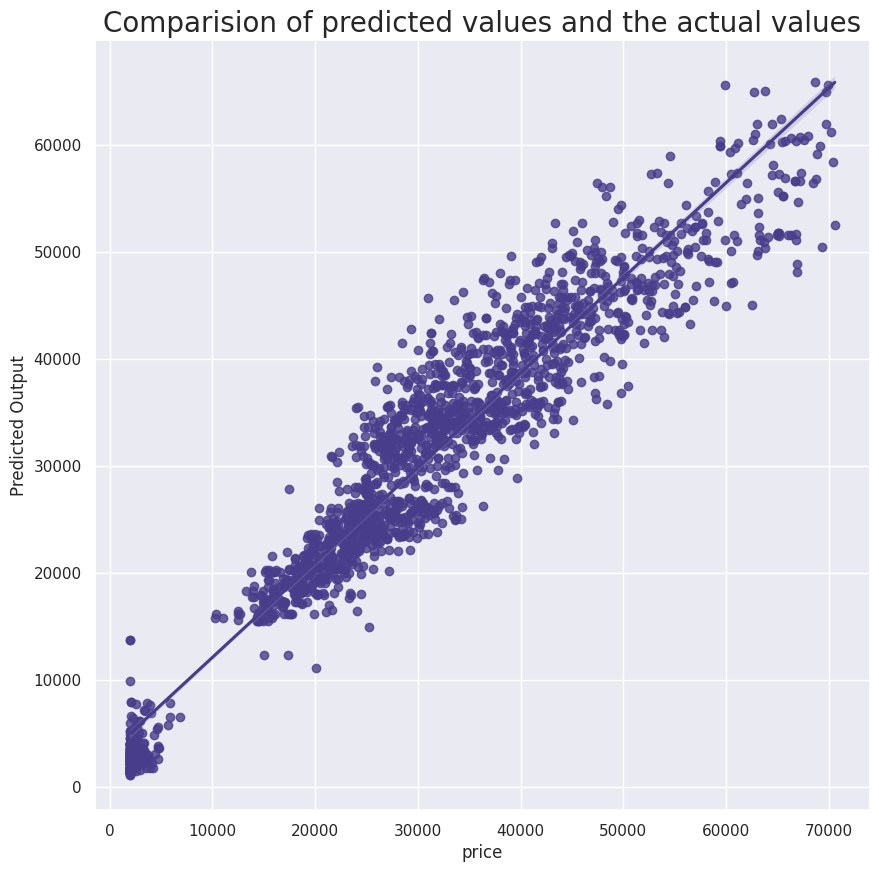

In [89]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

###MLP Regressor

In [90]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
r2 = r2_score(y_test, y_predict)
print('R2 Score is : ', r2)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
print('Mean squared error is : ', math.sqrt(mean_squared_error(y_test, y_predict)))
print('Mean absolute error is : ', mean_absolute_error(y_test, y_predict))

R2 Score is :  0.9489940521431413
Mean squared error is :  3643.723232508459
Mean absolute error is :  2443.6751212178165


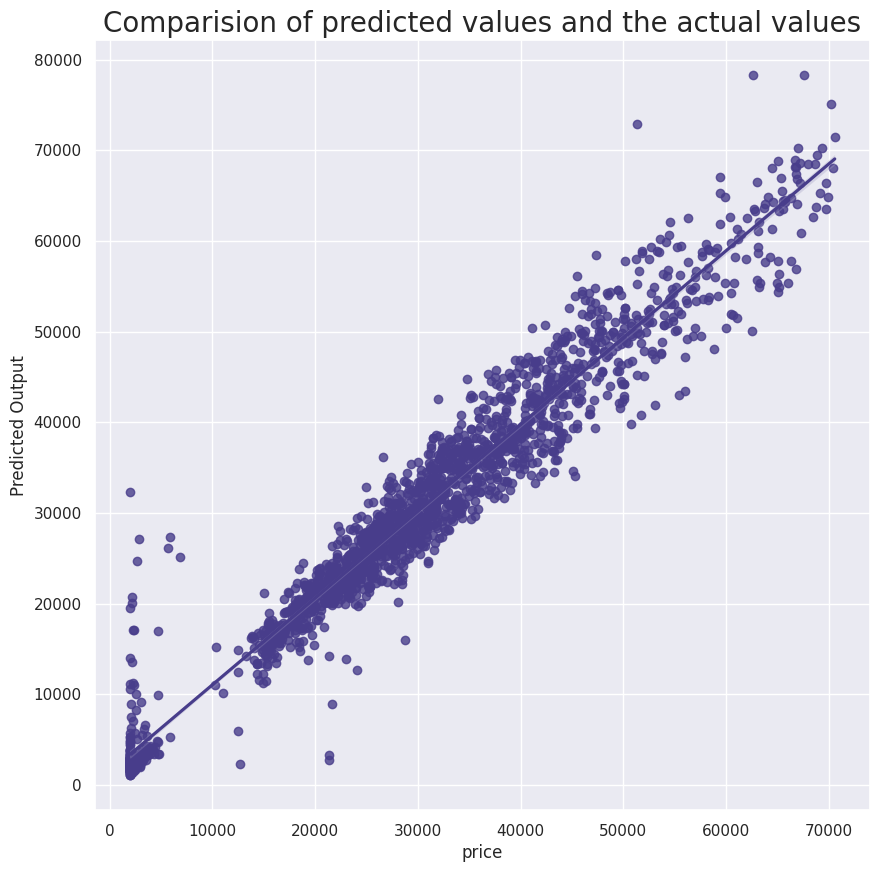

In [91]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()